In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./../data/Diabetes 130 US Hospitals 1999-2008/diabetic_data.csv')

In [3]:
ids = pd.read_csv('./../data/Diabetes 130 US Hospitals 1999-2008/IDS_mapping.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
df.shape

(101766, 50)

In [37]:
df.select_dtypes(['number']).columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'gender_num', 'weight_num', 'age_num', 'race_num'],
      dtype='object')

In [32]:
df['max_glu_serum'].unique()

array([nan, '>300', 'Norm', '>200'], dtype=object)

In [11]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,gender_num
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,2
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,2
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,2
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,1
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,1


In [34]:
df_encoded = df.copy()
mappings = {}
for col in df_encoded.select_dtypes(exclude="number").columns:
    df_encoded[col], uniques = pd.factorize(df_encoded[col])
    mappings[col] = dict(enumerate(uniques))

In [56]:
df_encoded['readmitted'].unique()

array([0, 1])

In [53]:
mappings['readmitted'] #our label: 0 means no, 1 means readmitted after 30 days, 2 means readmitted within 30 days. one model each or multi-label classification.

{0: 'NO', 1: '>30', 2: '<30'}

In [49]:
df_encoded['readmitted'] = df_encoded['readmitted'].map({0:0, 1:1, 2:1})

In [50]:
df_encoded.corr()['readmitted']

encounter_id               -0.038267
patient_nbr                 0.074093
race                       -0.036750
gender                     -0.018087
age                         0.030403
weight                      0.033550
admission_type_id          -0.004923
discharge_disposition_id   -0.014852
admission_source_id         0.039986
time_in_hospital            0.051289
payer_code                 -0.028880
medical_specialty          -0.019699
num_lab_procedures          0.039253
num_procedures             -0.044748
num_medications             0.046772
number_outpatient           0.082142
number_emergency            0.103011
number_inpatient            0.217194
diag_1                     -0.040974
diag_2                     -0.027417
diag_3                     -0.011379
number_diagnoses            0.112564
max_glu_serum               0.007225
A1Cresult                  -0.020994
metformin                  -0.026399
repaglinide                 0.022020
nateglinide                 0.003688
c

In [57]:
import matplotlib.pyplot as plt

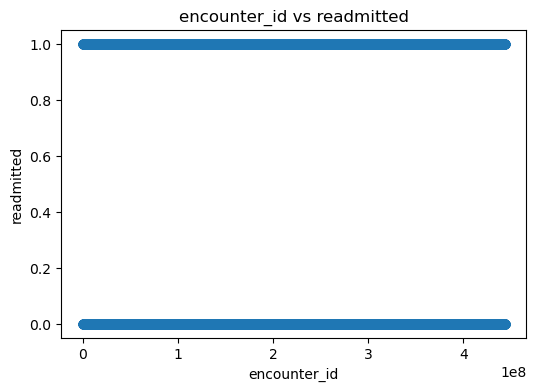

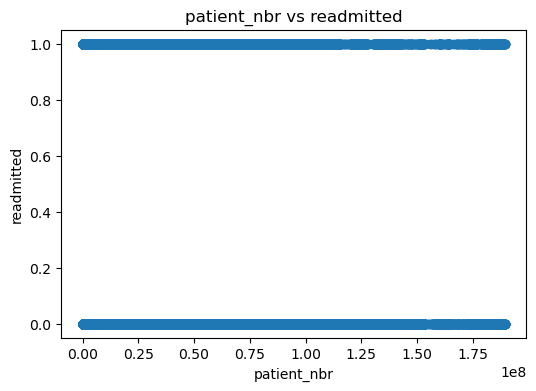

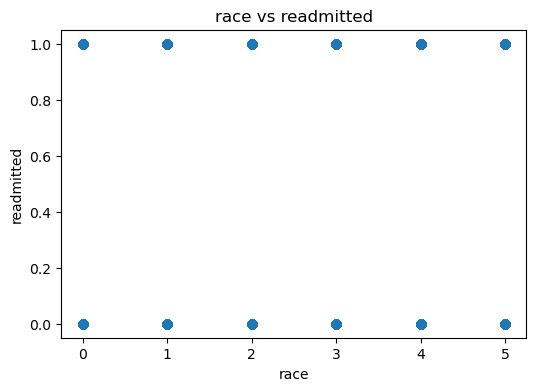

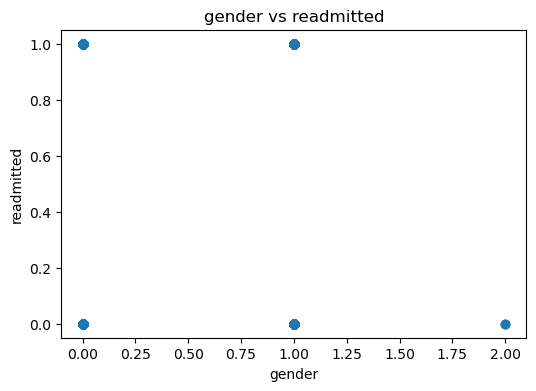

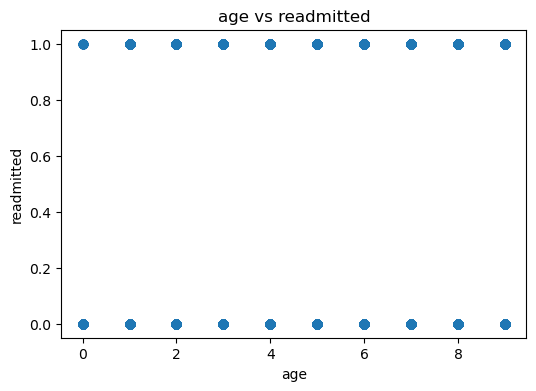

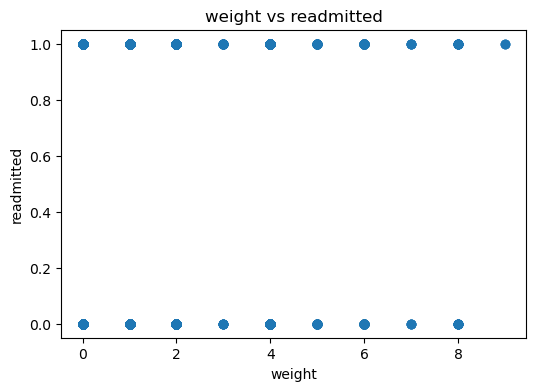

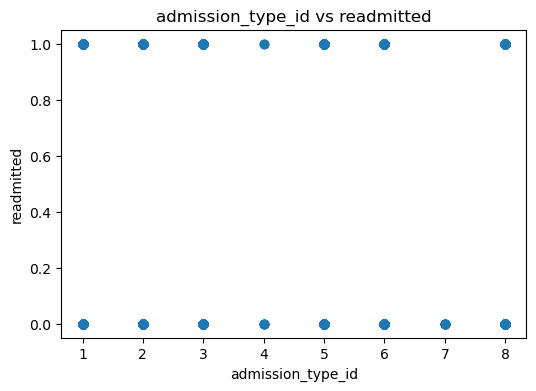

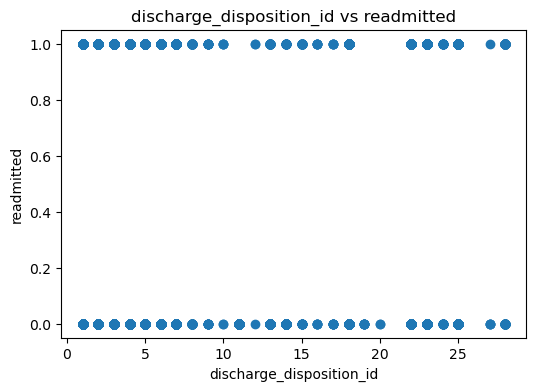

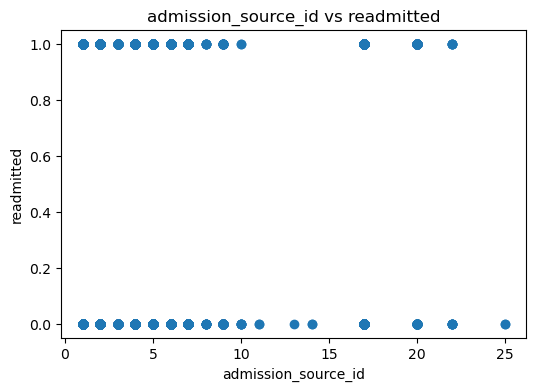

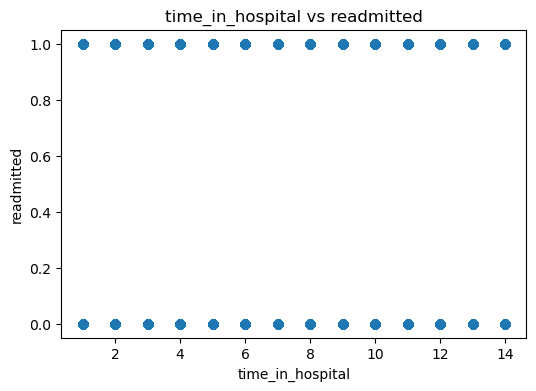

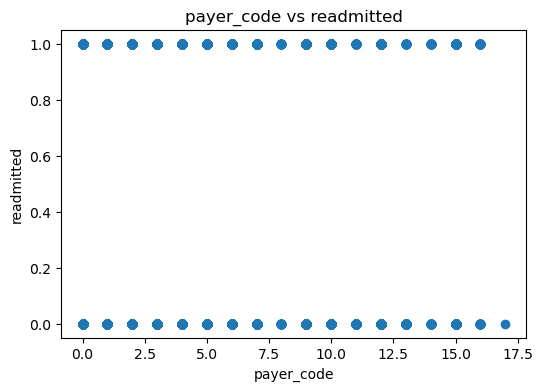

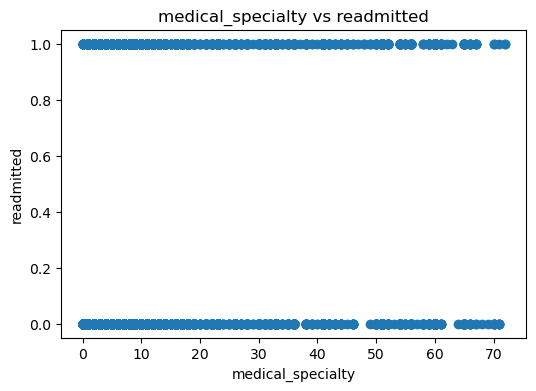

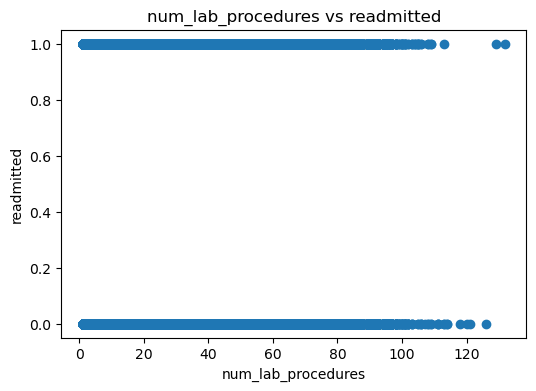

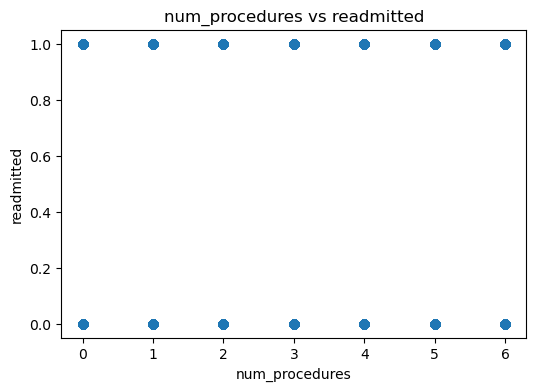

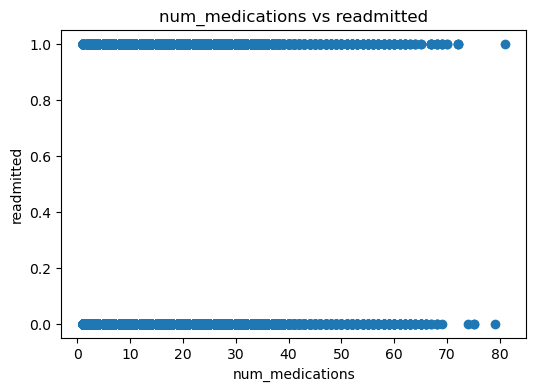

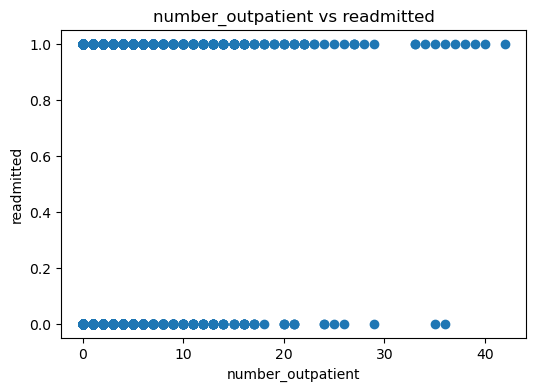

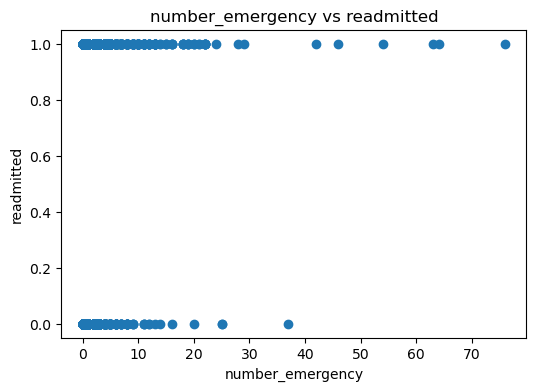

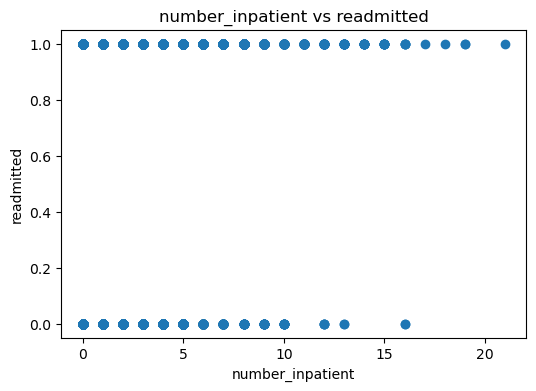

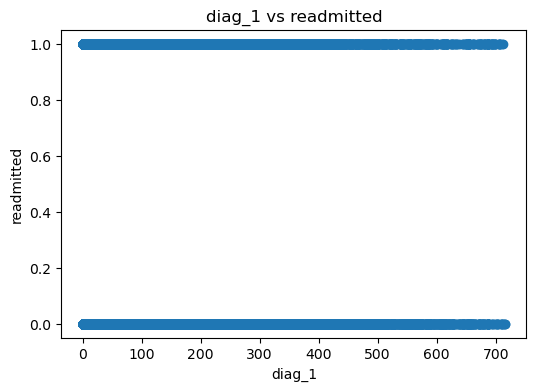

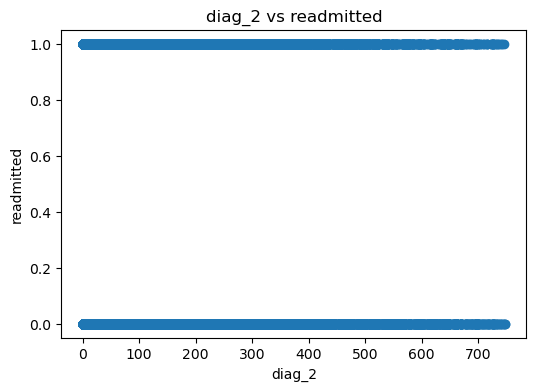

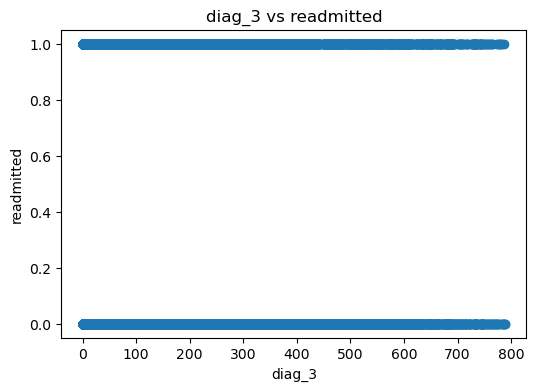

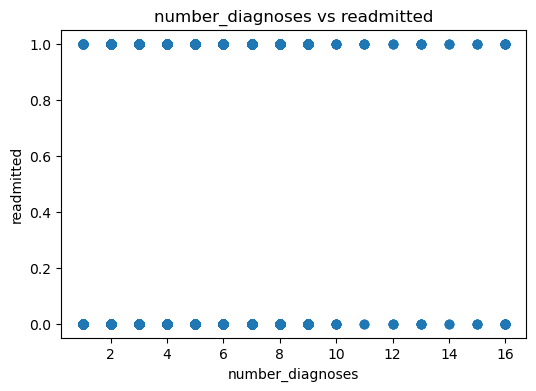

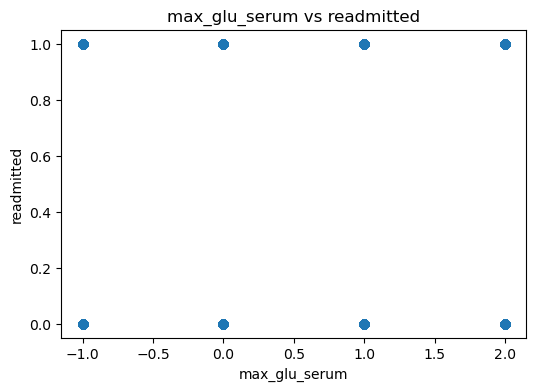

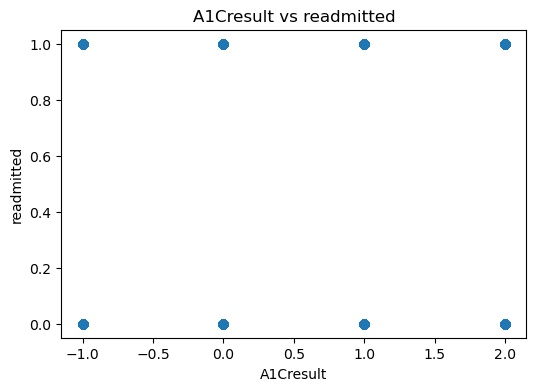

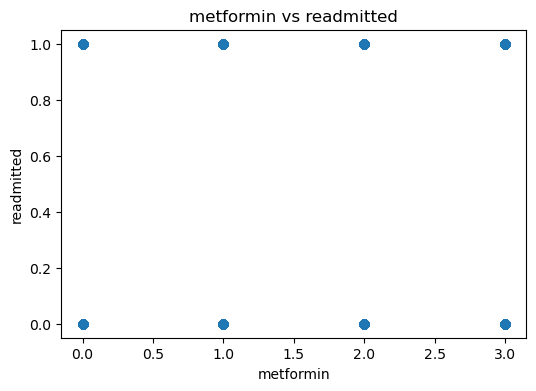

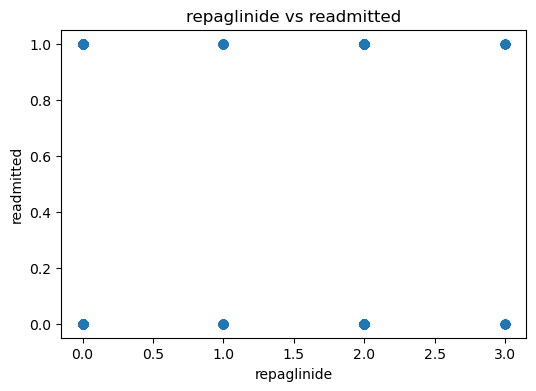

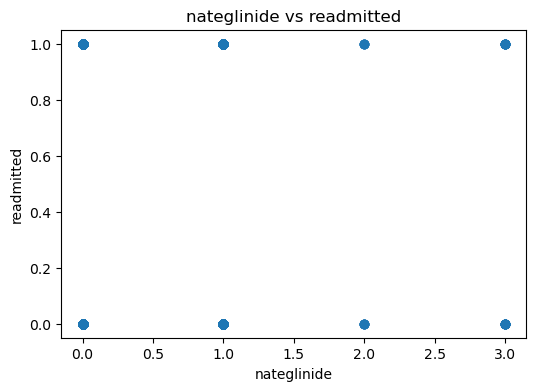

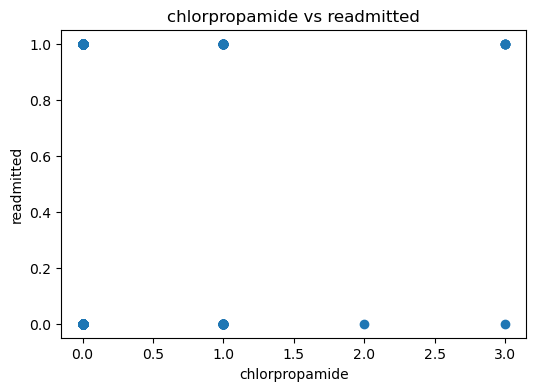

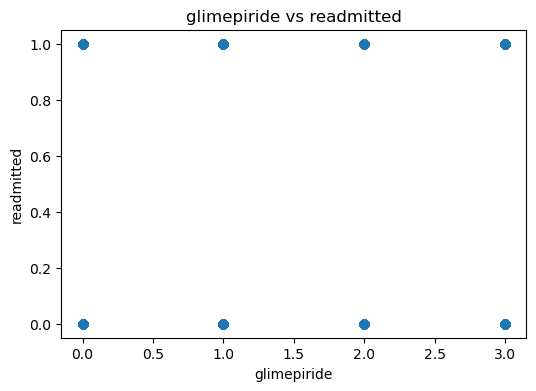

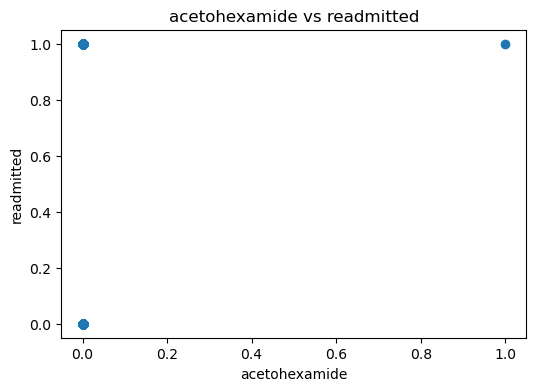

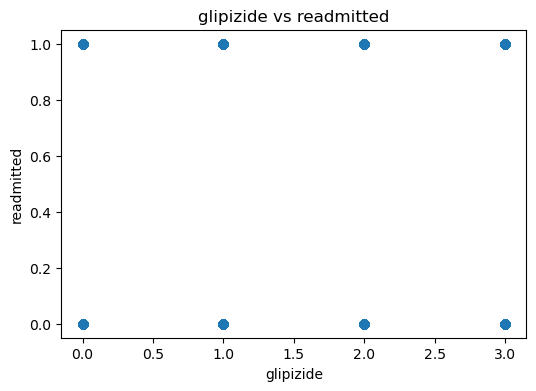

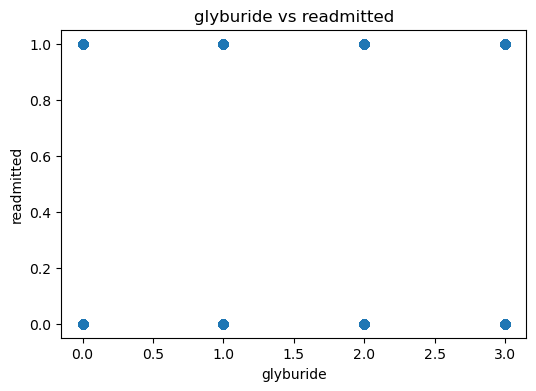

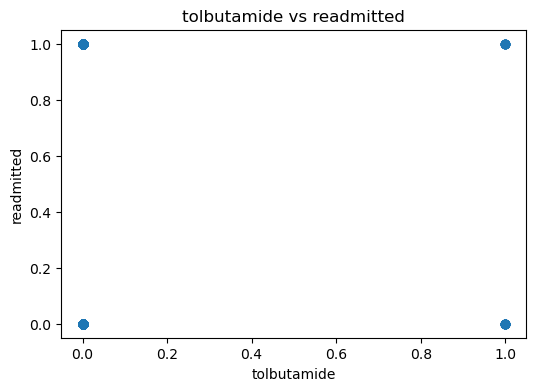

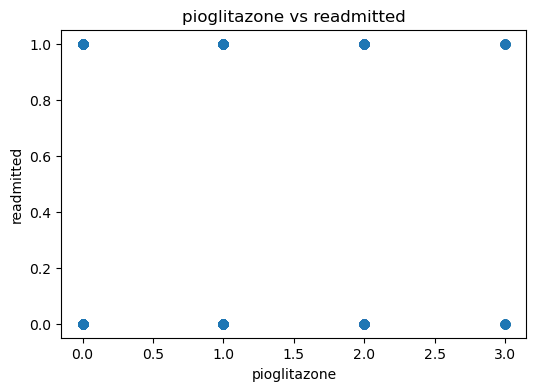

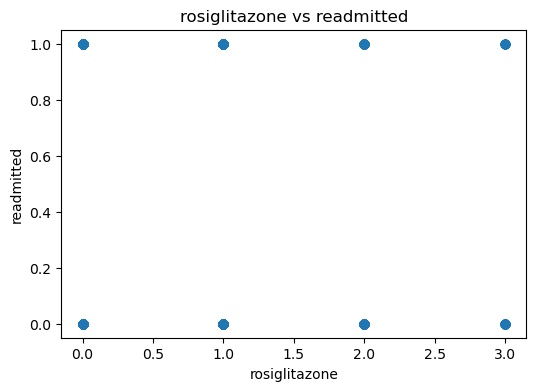

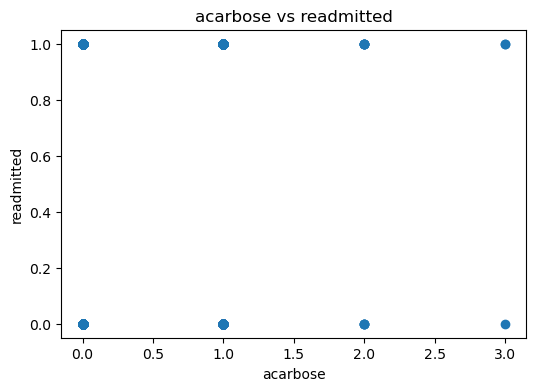

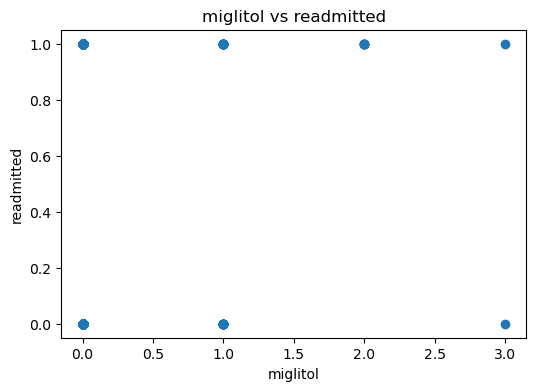

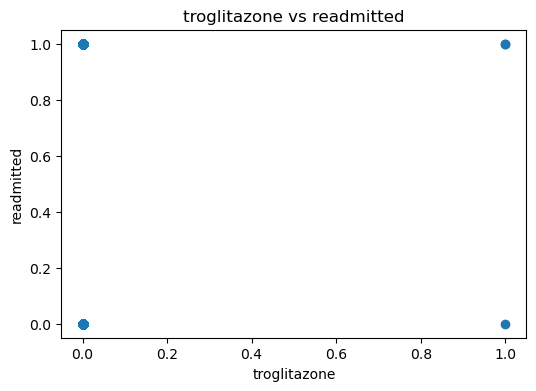

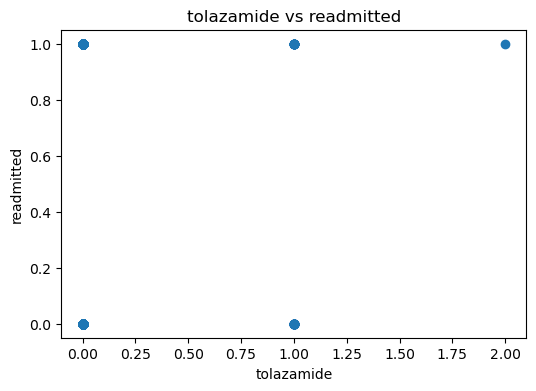

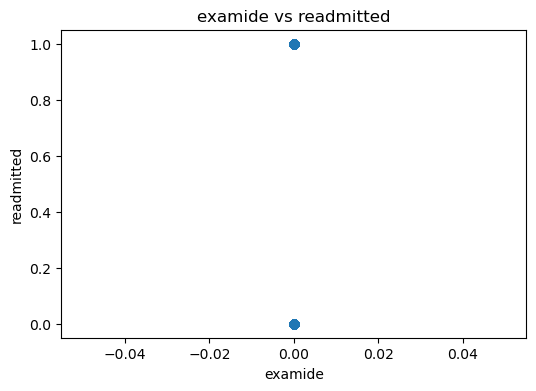

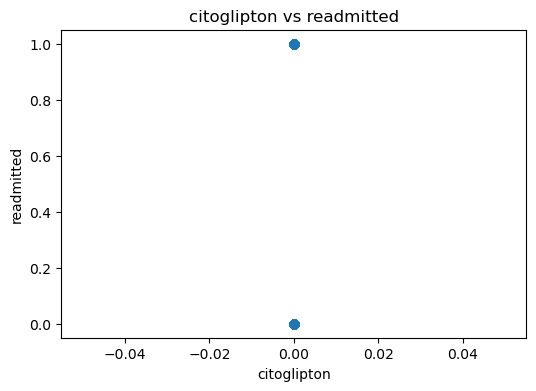

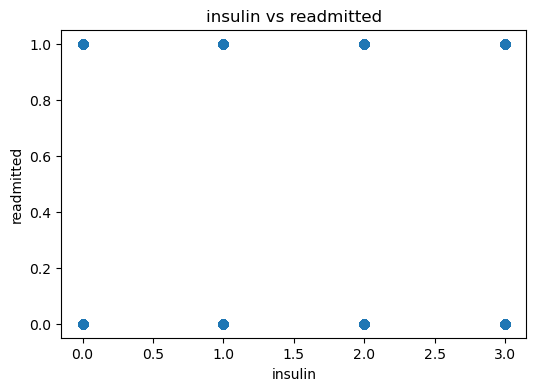

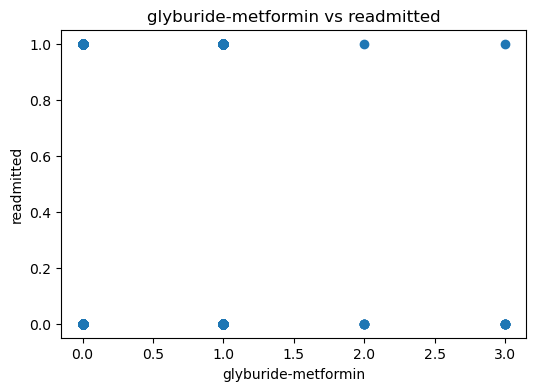

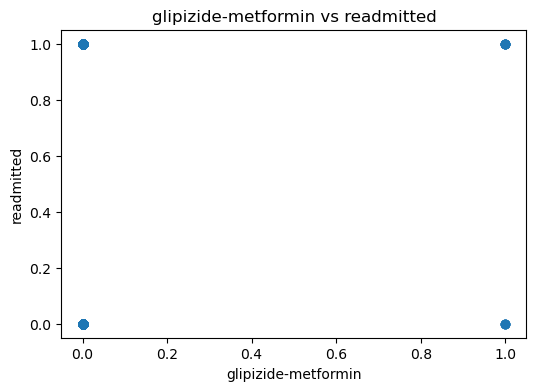

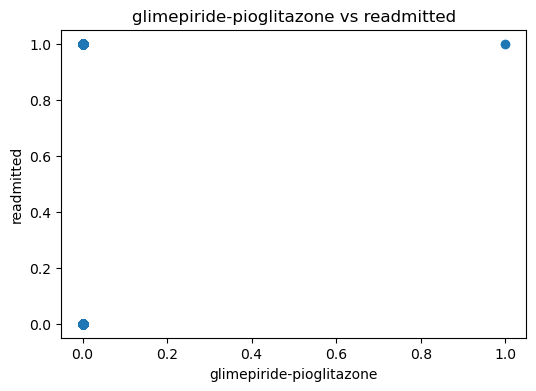

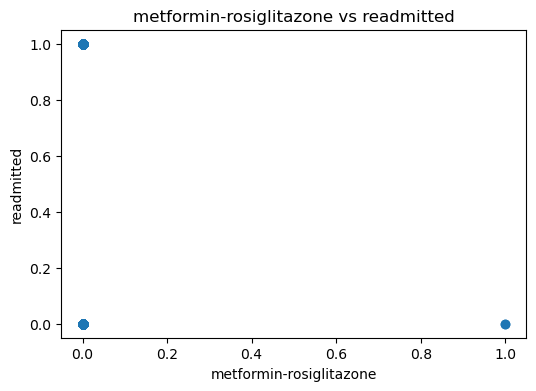

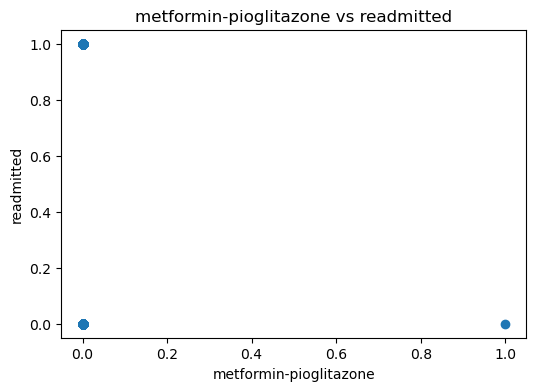

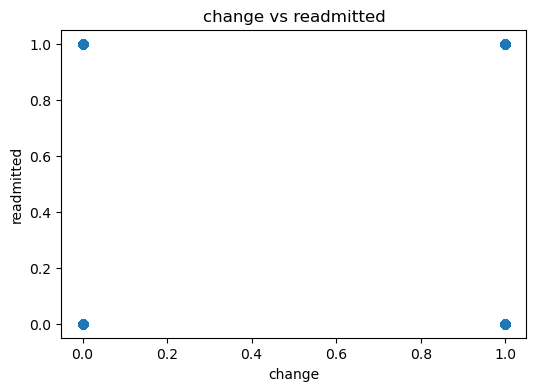

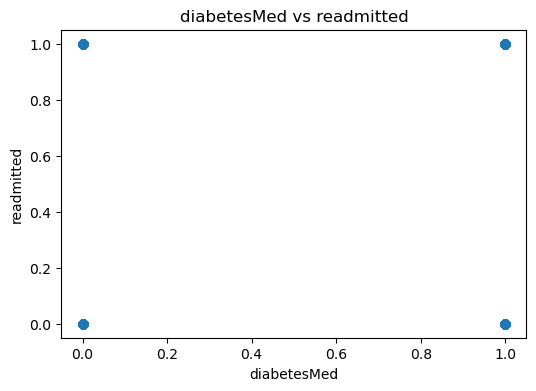

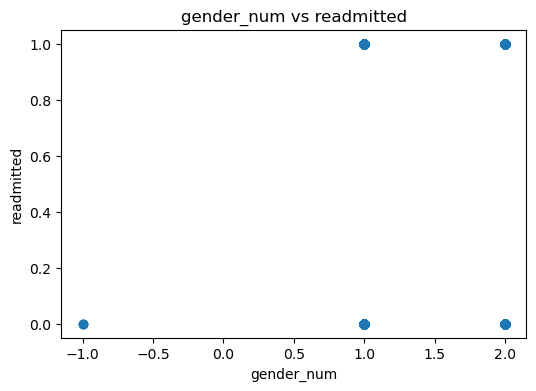

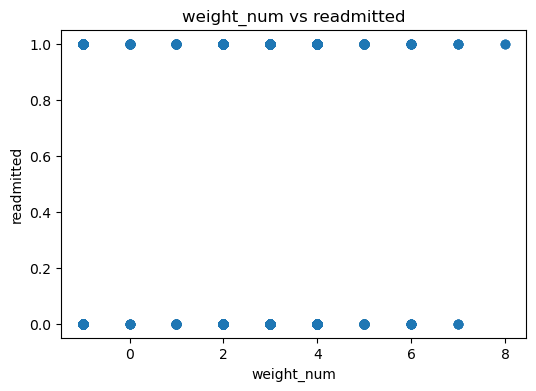

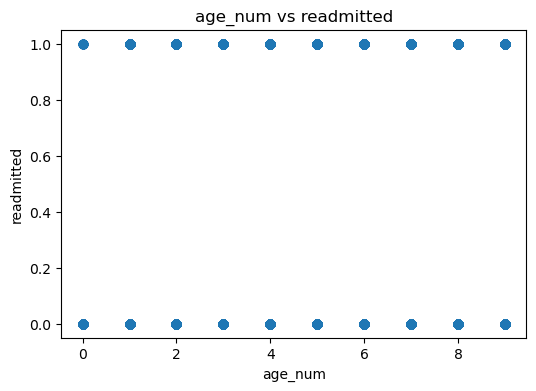

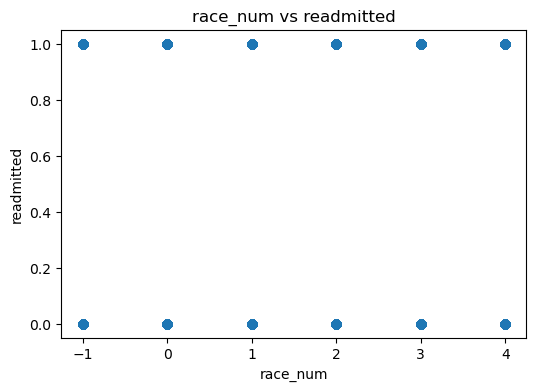

In [59]:
label = 'readmitted'
features = df_encoded.select_dtypes(include='number').columns.drop(label)
for col in features:
    plt.figure(figsize=(6,4))
    plt.scatter(df_encoded[col], df_encoded[label])
    plt.title(f"{col} vs {label}")
    plt.xlabel(col)
    plt.ylabel(label)
    plt.show()

# Findings to the eye
Strictly here, the ones with most predictive power (to the eye) are (after the mappings):
- number_emergency > 40, strictly readmitted,
- number_inpatient > 15, readmitted,
- acetohexamide ==1, Readmitted
- tolazamide = 2, readmitted,
- glimepiride-pioglitazone = 1, readmitted,
- metformin-rosiglitazone = 1, NOT readmitted,
- metformin - pioglitazone = 1, NOT readmitted.

I will later train a logistic regression on it or an xgboost classifier


In [97]:
print('acetahexamide: ')
mappings['acetohexamide']

acetahexamide: 


{0: 'No', 1: 'Steady'}

In [99]:
print('tolazamide: ')
mappings['tolazamide']


tolazamide: 


{0: 'No', 1: 'Steady', 2: 'Up'}

In [101]:
print('glimiperide-pioglitazone')
mappings['glimepiride-pioglitazone']

glimiperide-pioglitazone


{0: 'No', 1: 'Steady'}